# Uses ARQ for the sparql queries
require first to install 
* ARQ: on Mac <i>brew install jena</i>
* graphviz: on Mac <i>brew install graphviz</i>

### ARQ: select equivalent classes
(without reasoner)

In [8]:
%%script bash
arq --data https://raw.githubusercontent.com/marieALaporte/ontology-of-plant-stress/patch-1/src/ontology/oldPDO/PDOWithPatterns.n3 '
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>  
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>  
PREFIX owl: <http://www.w3.org/2002/07/owl#> 
PREFIX oio: <http://www.geneontology.org/formats/oboInOwl#>  
PREFIX obo: <http://purl.obolibrary.org/obo/>  
        
SELECT distinct ?disease ?disease1 
WHERE { 
    ?disease rdf:type owl:Class .
    filter regex(str(?disease), "PDO_")
    ?disease (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq .
    ?disease (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq1 . 
    ?disease1 (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq .
    ?disease1 (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq1 .      
    filter(!isblank(?eq) && !isblank(?eq1) && ?eq != ?disease && ?eq1 != ?disease && ?eq != ?eq1)
    filter regex(str(?disease1), "PDO_")
    filter (?disease != ?disease1)
}
'

-------------------------------------
| disease         | disease1        |
| obo:PDO_0000176 | obo:PDO_0000177 |
| obo:PDO_0000258 | obo:PDO_0000239 |
| obo:PDO_0000258 | obo:PDO_0000259 |
| obo:PDO_0000189 | obo:PDO_0000191 |
| obo:PDO_0000189 | obo:PDO_0000190 |
| obo:PDO_0000223 | obo:PDO_0000251 |
| obo:PDO_0000223 | obo:PDO_0000252 |
| obo:PDO_0000259 | obo:PDO_0000258 |
| obo:PDO_0000259 | obo:PDO_0000239 |
| obo:PDO_0000073 | obo:PDO_0000216 |
| obo:PDO_0000202 | obo:PDO_0000260 |
| obo:PDO_0000033 | obo:PDO_0000078 |
| obo:PDO_0000033 | obo:PDO_0000084 |
| obo:PDO_0000216 | obo:PDO_0000073 |
| obo:PDO_0000252 | obo:PDO_0000251 |
| obo:PDO_0000252 | obo:PDO_0000223 |
| obo:PDO_0000191 | obo:PDO_0000190 |
| obo:PDO_0000191 | obo:PDO_0000189 |
| obo:PDO_0000250 | obo:PDO_0000249 |
| obo:PDO_0000187 | obo:PDO_0000221 |
| obo:PDO_0000179 | obo:PDO_0000180 |
| obo:PDO_0000179 | obo:PDO_0000178 |
| obo:PDO_0000078 | obo:PDO_0000033 |
| obo:PDO_0000078 | obo:PDO_0000084 |
| obo:PDO_00

### Uses Graphiz to display the results
require the python library rdflib

In [16]:
%%script bash
arq --data https://raw.githubusercontent.com/marieALaporte/ontology-of-plant-stress/patch-1/src/ontology/oldPDO/PDOWithPatterns.n3 '
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>  
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>  
PREFIX owl: <http://www.w3.org/2002/07/owl#> 
PREFIX oio: <http://www.geneontology.org/formats/oboInOwl#>  
PREFIX obo: <http://purl.obolibrary.org/obo/>  
        
CONSTRUCT {
    ?disease owl:equivalentTo ?disease1 .
}
WHERE { 
    ?disease (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq .
    ?disease (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq1 .  
        
    ?disease1 (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq .
    ?disease1 (owl:equivalentClass|(owl:intersectionOf/rdf:rest*/rdf:first/owl:someValuesFrom))* ?eq1 .  
    
    filter(!isblank(?eq) 
           && !isblank(?eq1) 
           && !isblank(?disease)
           && !isblank(?disease1) 
           && ?eq != ?disease 
           && ?eq1 != ?disease 
           && ?eq != ?eq1)
    filter (?disease != ?disease1)
}LIMIT 5
' > toto.n3

In [17]:
%%bash
rdf2dot toto.n3 | dot -Tpng > toto.png

Loading toto.n3 as n3... done.	(3 triples	0.01 seconds)
Loaded a total of 3 triples in 0.01 seconds.


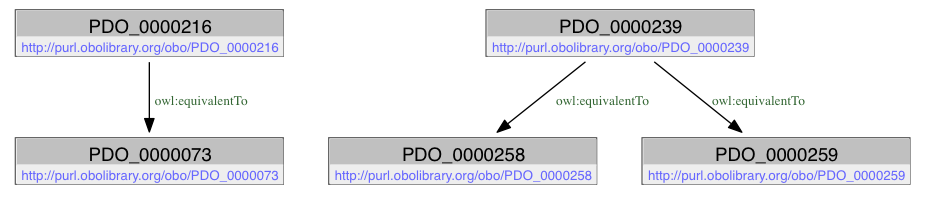

In [18]:
from IPython.display import Image
Image("toto.png")